<a href="https://colab.research.google.com/github/oscar221307/PROCESAMIENTO/blob/main/LABORATORIO_01_PROCESAMIENTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

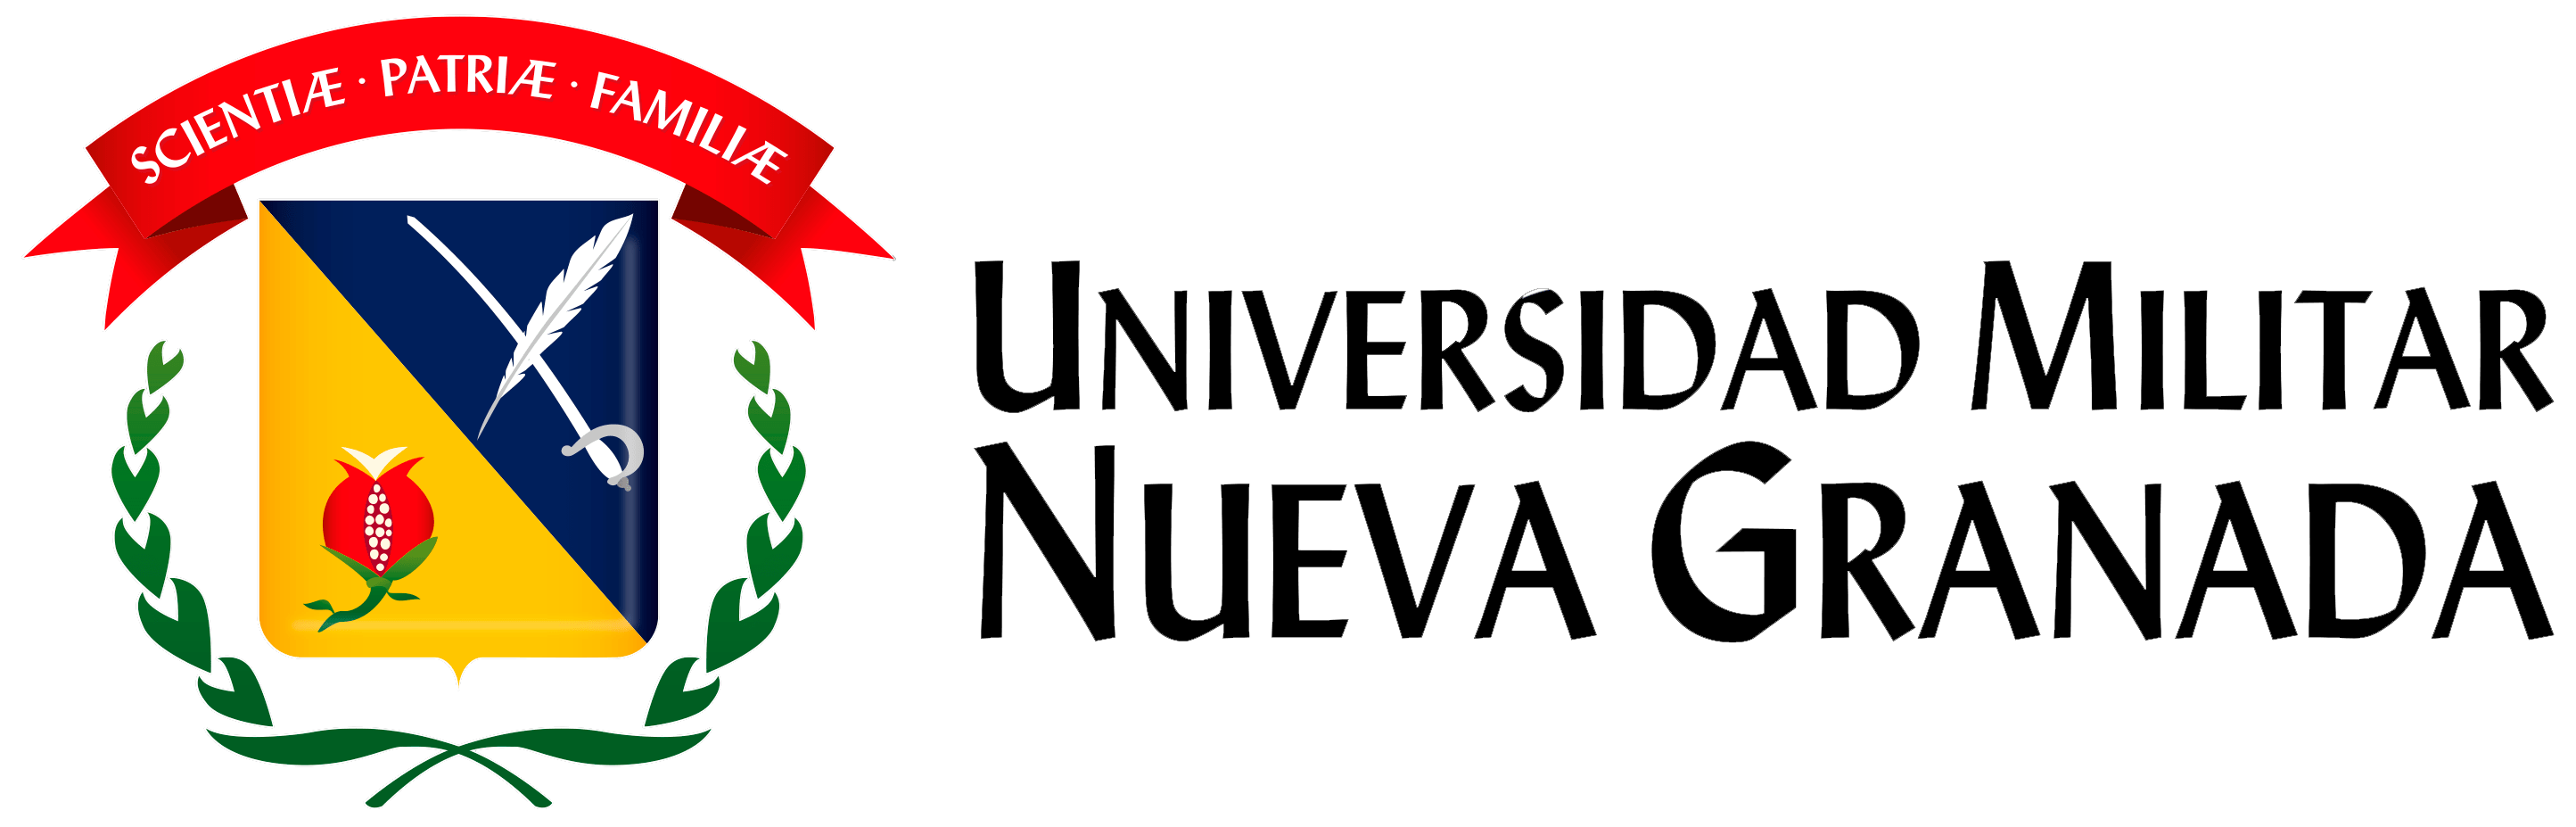




**Informe #01, “Análisis Estadístico De La Señal” :**

Lauren Blanco, Sofía Suárez – 5600585 (est.lauren.blanco@unimilitar.edu.co)

Oscar Acero, David Sarmiento – 5600602(est.oscar.acero@unimilitar.edu.co)

Laboratorio de Procesamiento Digítal de Señales

Doc. Andrea Carolina Corredor Bedoya

01 Agosto 2024

---

**1.	Resumen:**  A lo largo del desarrollo práctico el presente laboratorio, busca analizar el funcionamiento correlacional de las señales biomédicas mediante procesos computacionales (Programación) y estadísticos. En primer lugar, se hace uso de bases de datos como PhysioNet, para adquirir la señal, la cual va a hacer manipulada y analizada mediante cálculos estadísticos como lo son la media, desviación estándar, coeficientes de varianza y más gráficamente por histogramas. Además, se calculará la relación de señal- ruido (SNR), introduciendo diferentes tipos de ruido (gaussiano, impulso y artefacto), que serán importantes para evaluar la afectación de la señal en diferentes condiciones y mostrar así de manera concisa los datos matemáticos obtenidos.

  **Palabras Claves:** Adquisición, Base de Datos PhysioNet, Coeficientes de
Variación, Desviación Estándar, Histograma, Media, Ruido, Señal, Estadística.


---

**2.Objetivo de la Práctica:** Identificar los estadísticos que describen una señal biomédica, obtenerlos a partir de algoritmos de programación y mostrarlos.



---

**3. Procedimiento, Desarrollo y Análisis:**

**3.1 Extracción de la Señal Mediante Base de Datos (PhysioNet)**: Se visita el sitio web de PhysioNet, la cual ofrece variedad de datos de la señal biomédica, allí navegando hicimos la selección de la base de datos titulada **“Base de datos de ECG-ID"** como se muestra en la siguiente imágen:

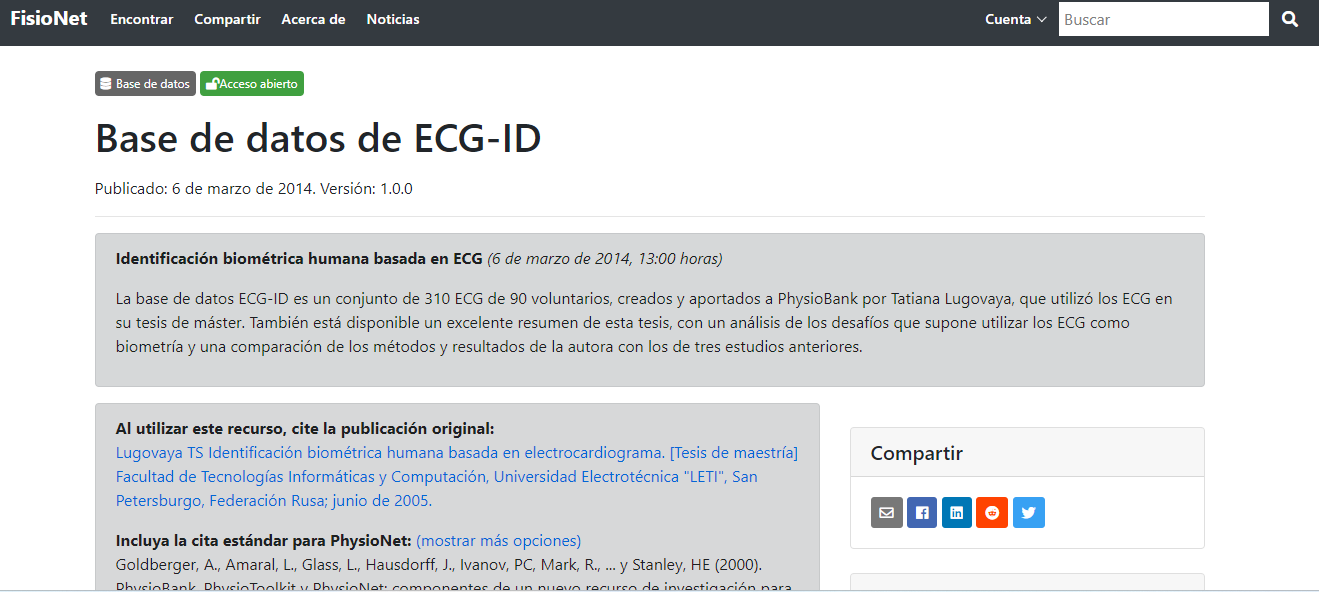

**Figura #01. " Evidencia de Navegación por Base de Datos PhysioNet ". https://physionet.org/content/ecgiddb/1.0.0/Person_01/#files-panel**



Una vez descargada la señal, se descargan los archivos en formato **.dat** y **.hea** los cuales fueron exportados a una carpeta común donde se guardarón todos los documentos necesarios, como se muestra acontinuación :

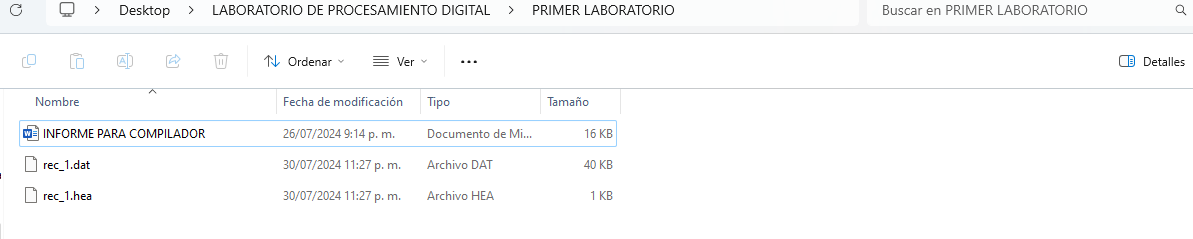

**Figura #02.  " Carpeta con formatos .dat y .hea ". Elaboración Propia.**


**3.2 Importación y Visualización de la Señal en Python:** En este apartado se importar la señal en python y  se gráfica. Para esto se descargan las librerias **numpy**, **matplotlib**, **wfdb**. Para manejar los archivos **.dat** y **.hea** extraidos de la base de datos y de esta forma visualizarla de manera gráfica:















In [ ]:
!pip install matplotlib
!pip install wfdb
!pip install colorama
!pip install numpy
!apt-get install git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 2.0 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


Numero de señales: 2


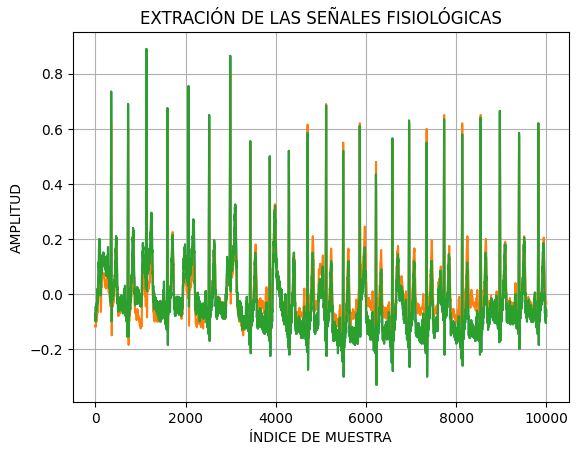

In [ ]:

#importación de las librerias
import wfdb # accede a DataBase
import numpy as np #operaciones
import matplotlib.pyplot as plt #Graficar
from colorama import Fore, init #Colores

#Cargar Información "señal"
# Hay que tener ambos archivos  : .dat .hea

#crear variable para llamar a la señal (signal)
signal = wfdb.rdrecord('rec_1') # lee el archivo de la señal de la DataBase
plt.plot(signal.p_signal) # muestra las dos señales ploteadas


#Extrae los valores de la Primera señal
#En la extracción se observan 2 señales por lo cual se toma para trabajar
#la siguiente forma
#"valores = señal.p_signal[fila todos los valores (:), columna inicial 0]"" para
#obtener solo datos de la señal 1 (0)

valoresgraf = signal.p_signal[ :, 0]  # Obtiene los datos de la primera señal

# Imprime el número de señales en el archivo
print("Numero de señales:",signal.n_sig)

# Plotea la señal
plt.plot(valoresgraf)  # Crea un gráfico de los valores de la señal
plt.title('EXTRACIÓN DE LAS SEÑALES FISIOLÓGICAS')  # Título del gráfico
plt.xlabel('ÍNDICE DE MUESTRA')  # Nombre del eje x
plt.ylabel('AMPLITUD')  # Nombre del eje y
plt.grid(True)  # Añade una cuadrícula al gráfico
plt.show()


**Gráfico #01. " Gráfica de las Dos Señales  Fisiologicas Extraidas Por La DataBase ". Elaboración Propia.**

Valores de las señal 1 : [-0.085 -0.08  -0.07  ... -0.065 -0.08  -0.08 ]
longitud de la señal: 10000


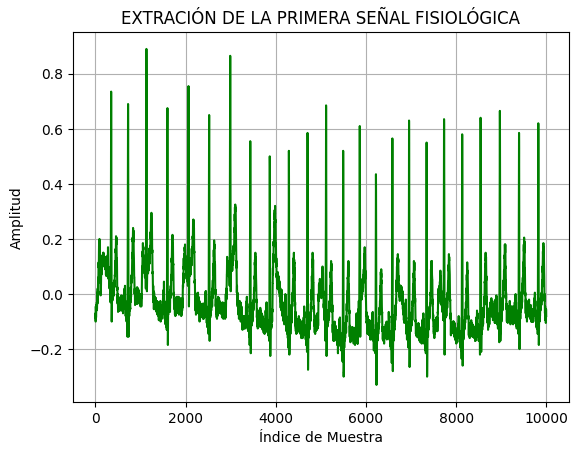

In [ ]:
# Imprime los primeros valores de la primera señal con la que se esta trabajando
print("Valores de las señal 1 :",signal.p_signal[ :, 0])

# Imprime la longitud de la primera señal
print("longitud de la señal:",len(signal.p_signal[ :, 0]))

# Plotea la señal
plt.plot(valoresgraf,color ='green')  # Crea un gráfico de los valores de la señal
plt.title('EXTRACIÓN DE LA PRIMERA SEÑAL FISIOLÓGICA')  # Título del gráfico
plt.xlabel('Índice de Muestra')  # Nombre del eje x
plt.ylabel('Amplitud')  # Nombre del eje y
plt.grid(True)  # Añade una cuadrícula al gráfico
plt.show()

**Gráfica #02. " Gráfica de las Señal Fisiólogica 0 de la DataBase, Con la cuál Se Va Trabajar". Elaboración Propia.**

**3.3 Cálculo de Estadísticos Descriptivos:** Teniendo en cuenta la extración de la señal fisiológica, Para lograr el objetivo general de la practica,  Identificaremos los  calculos de los diversos estadísticos descriptivos utilizando dos métodos:

1. El primero consiste en implementar las fórmulas desde cero mediante el (Método Mátematica).
2. El segundo en usar funciones predefinidas de Python.

Por tanto, se presentan las medidas estadísticas que se esperan obtener:  

**3.3.1 Media de la Señal:** En el libro Introducción a la probabilidad y estadística, Mendenhall.et al(2022),  se presenta la **media** o **promedio** como una medida central fundamental en el análisis de datos estadísticos, la cual proporciona una indicación de la tendencia central de los datos, es decir, el valor en torno al cual los datos tienden a agruparse.
Finalmente, esta medida se obtiene sumando todos los valores de un conjunto de datos y dividiendo el total entre el número de valores.

A continuación, se muestra las notaciones caracteristicas de esta medida:

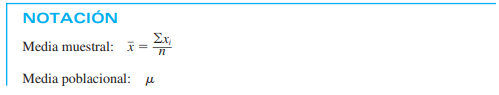

**Figura #05. "Tipos de Notaciones de la Muestra ". Extraida del libro Introducción a la probabilidad y estadística.**

Para el desarrollo de este apartado, emplearemos la notación de la media poblacional (𝜇) en lugar de la media muestral para el análisis de los datos de la señal seleccionada. La razón para optar por la media poblacional radica en que permite incorporar todos los datos de la población completa, proporcionando así una medida precisa del centro de la distribución de datos. En este caso, la población se refiere a los datos obtenidos de la primera señal fisiológica extraída, lo que garantiza una representación exacta y exhaustiva del conjunto completo de datos.

Con lo anterior , se presentan los cálculos estadísticos utilizando el método matemático y funciones predefinidas de Python los cuales deben comprobarse entre si (dar el mismo resultado):

**1. Método Matemático:** En este método matemático, se empleará la fórmula de la media poblacional, la cual consiste en sumar todos los valores de la población y dividir el total entre el número total de elementos (𝑁). Esta fórmula se expresa como:

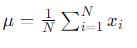

donde:
* 𝜇 es la media poblacional.
* 𝑁 es el número total de elementos en la población.
* 𝑥𝑖 representa cada uno de los valores individuales en la población.
* ∑N𝑖=1𝑥𝑖 es la suma de todos los valores en la población.

In [ ]:
# Leer el registro de la señal
signal = wfdb.rdrecord('rec_1')

# Extraer los valores de la señal
valoresgraf = signal.p_signal[:, 0]

# Calcular la media de la señal metodo matemático
# signal.p_signal[:, 0]: es una matriz que contiene los datos de la señalselecciona todos los puntos de tiempo (todas las filas) para el primer canal de la señal (la primera columna)
# np.sum() es una función de NumPy que suma todos los elementos de la señal
# signal.p_signal.shape[0]: muestra la longitud de la señal, es decir, el número total de puntos de datos en la señal.

media = np.sum(signal.p_signal[ :, 0])/ signal.p_signal.shape[0]
print(Fore.CYAN+ "Media de la señal: " + str(media) )

Media de la señal: -0.024002000000000002


**2. Método Funciones Predefinidas De Python:** El método de funciones predefinidas de Python se usa para calcular la media de la señal utilizando herramientas y funciones integradas en las bibliotecas de Python con el fin de realizar el cálculo de manera eficiente y simplificada.

Las librerias utilizadas parten de la biblioteca NumPy:

*   **Función np.mean():**  Es una función perteneciente a la biblioteca NumPy que calcula el promedio (o media aritmética) haciendo uso de un array.

*   **valoresgraf:** Es un array que va dentro de la función **np.mean()** que se encarga de sumar todos los valores del array y luego dividirlo entre el número total de elementos en el array para obtener la media.

*  **Función print():** Es una función incorporada de Python utilizada para imprimir información como la del nombre Mediapy  en la consola.

*  **Función Fore.color:** Es un atributo de colorama que restablece el color del texto al valor predeterminado de la consola después de la impresión.


In [ ]:
# Calculamos la media de los valores usando la función mean de numpy
mediapy = np.mean(valoresgraf)

# Imprimimos la media utilizando la librería colorama para agregar color al
# texto
print(Fore.CYAN + "Media Función Python:", mediapy)

Media Función Python: -0.024002000000000002


**3.3.2 Desviación Estandar:** La **desviación estándar (σ)** se define como una medida clave en estadística que cuantifica la cantidad de variación o dispersión de un conjunto de datos respecto a su media. Esta se calcula tomando la raíz cuadrada de la varianza. La desviación estándar proporciona una comprensión clara de cuánto se desvían, en promedio, los datos individuales de la media, y es crucial para interpretar los resultados en diversas aplicaciones estadísticas como lo dice (Witte & Witte, 2017 ) en su libro Estadística.

Con lo anterior , se presentan los cálculos estadísticos utilizando el método matemático y funciones predefinidas de Python los cuales deben comprobarse entre si (dar el mismo resultado):

**1. Método Matemático:** En este método matemático, se empleará la fórmula de la desviación estandar, la cual consiste en medir la cantidad de dispersión o variabilidad en el conjunto de datos proporcionando una cuantificación que evidencia cuán dispersos están los datos alrededor de la media para la población completa de datos adquiridos de la señal. Haciendo uso de la siguiente formula.

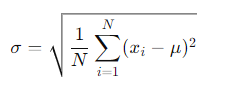

Donde:

* σ Es la desviación estándar de la población.
* 𝑁 Es el número total de datos en la población.
* 𝑥𝑖 son los valores individuales de la población.
* 𝜇 Es la media de la población.

**El procedimiento que se lleva acabo para obtener el valor de la desviación, cumple el siguiente paso a paso:**

* Se encuentra la media del conjunto de datos.
* Se Calcula las Diferencias al Cuadrado, alli se Resta la media de cada valor del conjunto de datos  y se eleva al cuadrado cada diferencia.
* El promedia de las Diferencias al Cuadrado se llama varianza
* Cancelando la raiz cuadrada se obtiene la  desviación estándar.


In [ ]:
# Calculamos la desviación estándar np.sum((valoresgraf - media) ** 2) calcula
# la suma de los cuadrados de las diferencias entre cada valor y la media
# np.sqrt() toma la raíz cuadrada del resultado para obtener la desviación
# estándar

desviacion_estandar = np.sqrt(np.sum((valoresgraf - media) ** 2) / (len(valoresgraf) - 1))

# Imprimimos la media utilizando la librería colorama para agregar color al
# texto
print (Fore.CYAN +"Desviación Estandar:",desviacion_estandar)


Desviación Estandar: 0.12935761413706393


**2. Método Funciones Predefinidas De Python:** El método de funciones predefinidas de Python se usa para calcular la media de la señal utilizando herramientas y funciones integradas en las bibliotecas de Python con el fin de realizar el cálculo de manera eficiente y simplificada.

Las librerias utilizadas parten de la biblioteca NumPy:

*   **Función np.std():** Es una función perteneciente a la biblioteca NumPy que calcula la desviación estándar de los elementos en un array.

*   **Función np.std(valoresgraf):** Calcula la desviación estándar de los valores en el array valoresgraf.

*   **Función std:** Por defecto calcula la desviación estándar para toda la población.

*  **Función Fore.color:** Es un atributo de colorama que restablece el color del texto al valor predeterminado de la consola después de la impresión.




In [ ]:
# Calculamos la desviación estándar de los valores en el array 'valoresgraf'
# utilizando la función std de numpy. `np.std(valoresgraf)` devuelve un solo
# valor que representa esta medida.
desestaformula = np.std(valoresgraf)

# Imprimimos la media utilizando la librería colorama para agregar color al texto
print (Fore.CYAN +"Desviación Estandar Función Python:",desestaformula)


Desviación Estandar Función Python: 0.12935114609465198


**3.3.3 . Coeficiente de Variación:** Se define como  **coeficiente de variación (CV)** a el cociente de la desviación estándar y la media, multiplicado por 100 para obtener un porcentaje (Johnson, 2019, p. 158).


Con lo anterior , se presentan los cálculos estadísticos utilizando el método matemático y funciones predefinidas de Python los cuales deben comprobarse entre si (dar el mismo resultado):

**1. Método Matemático:** En este método matemático, se empleará la fórmula de coeficiente de variación para medir la dispersión relativa del conjunto de datos de la señal en relación con su media. Haciendo uso de la siguiente formula.

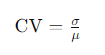

Donde:
* σ es la desviación estándar del conjunto de datos.
* 𝜇 es la media del conjunto de datos.

**El procedimiento que se lleva acabo para obtener el coeficiente de variación, cumple el siguiente paso a paso:**

* Calculo de la media, se suma todos los valores del conjunto de datos  de la señal y se divide por el número total de valores para obtener el promedio ( 3.3.1).

* Calculo de la desviación estandar (3.3.2).
* Calculo del coeficiente de variación , primero Divide la desviación estándar por la media.

In [ ]:
# Cálculo del coeficiente de variación como porcentaje
# se divide la desviación estandar sobre la muestra y se multiplica por 100
#para obtener el porcentaje
cv = np.absolute(desviacion_estandar / media)

# Imprimir el coeficiente de variación en color cian
print(Fore.CYAN + "Coeficiente de variación:", cv)

Coeficiente de variación: 5.389451468088656


**2. Método Funciones Predefinidas De Python:** El método de funciones predefinidas de Python se usa para calcular la media de la señal utilizando herramientas y funciones integradas en las bibliotecas de Python con el fin de realizar el cálculo de manera eficiente y simplificada.

Las librerias utilizadas parten de la biblioteca NumPy:

* **Función np.std():** Es una función perteneciente a la biblioteca NumPy que calcula la desviación estándar de los elementos en un array.

* **Función np.mean:** Es la función que toma el array de números de la señal y lo vuelve el promedio aritmético. La fórmula es la suma de todos los valores dividida por el número de valores

* **Función Fore.color:** Es un atributo de colorama que restablece el color del texto al valor predeterminado de la consola después de la impresión.

In [ ]:
# Calcular la desviación estándar de los datos
# Nota: `np.std` calcula la desviación estándar.
# Por defecto, calcula la desviación estándar para la población completa de
# la señal.
cvpy = np.absolute(np.std(valoresgraf)/np.mean(valoresgraf))

# Imprimir el coeficiente de variación en color cian
# `Fore.CYAN` establece el color del texto a cian
print( Fore.CYAN + "Coeficiente de Variación Función Python :",cvpy)

Coeficiente de Variación Función Python : 5.3891819887781


**3.3.4. Histograma :** Según Moore, McCabe y Craig (2017),un **histograma** es una representación gráfica que muestra la distribución de un conjunto de datos mediante barras. Cada barra representa un intervalo de valores y su altura refleja la frecuencia o el número de observaciones dentro de ese intervalo.

**Caracteristicas de un Histograma:**Teniendo en cuenta la literatura Introducción a la práctica de la estadística se muestran algunas caracteristicas representavivas para su construcción.

**1. Ejes**:
* **Eje x (Horizontal)**: Representa los intervalos en los que se dividen los datos. Cada intervalo abarca un rango específico de valores.

* **Eje Y (Vertical)**: Representa la frecuencia o la cantidad que pertenence dentro de cada intervalo.


 **2. Barra**:

* **Altura**: Representa la frecuencia de datos dentro del intervalo. Cuanto mayor sea la altura, más datos se encuentran en ese intervalo.

* **Anchura**: Representa el rango del intervalo de datos. Los intervalos pueden ser de igual o diferente tamaño.


**3.Frecuencia**:

* **Conteo**: Cada barra representa la frecuencia de datos en el intervalo correspondiente.

**4.Apariencia**:

* **Continuidad:** Los histogramas muestran datos continuos y las barras están generalmente pegadas entre sí.

* **Superposición:** Las barras no presentan espacio entre ellas,puesto que el histograma representa una distribución continua.

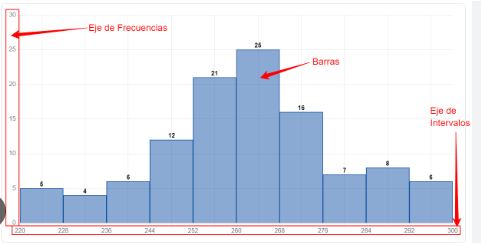



**Figura #03. "Partes de un Histograma". Extraido de plandemejora.**

Con lo anterior , se presentan los cálculos estadísticos utilizando el método matemático y funciones predefinidas de Python los cuales deben comprobarse entre si (dar el mismo resultado):

**1. Método Matemático:** En este método matemático, se espera transformar el conjunto de datos de la señal extraida en una representación gráfica que muestre cómo se distribuyen esos datos a través de diferentes intervalos.


**El procedimiento que se lleva acabo para obtener la construcción del histograma, cumple el siguiente paso a paso:**


* Se hace uso de la Recolección de datos mediante la extración de la señal.

* Se elige la cantidad de división de intervalos para los valores de la señal.

* Teniendo en cuenta lo anterior se calcula el ancho del intervalo haciendo uso de la siguiente formula:

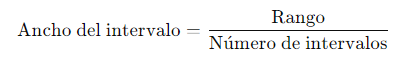

* Teniendo el ancho de los intervalos calculados.
* Finalmente, se realiza el conteo de frecuencias que permite saber cuántos datos estan presentes en cada intervalo.




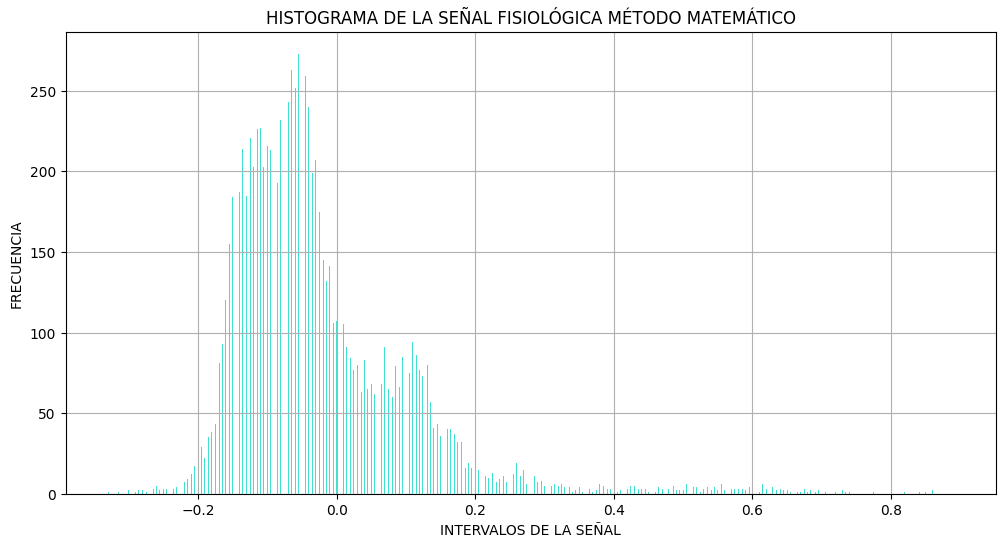

In [ ]:
valoresgraf = signal.p_signal[ :, 0]
# Obtiene los datos de la primera señal

# Número total de datos
n = len(valoresgraf)

# Determinación del rango de datos
min_valor = np.min(valoresgraf)
max_valor = np.max(valoresgraf)
rango = max_valor - min_valor

# Número de intervalos
k = 1000

#Calculo de los bordes de los intervalos
# np.linspace de NumPy se utiliza para generar la secuencia de números
# equidistantes en los intervalos
bins = np.linspace(min_valor, max_valor, k + 1)

# Calcular el histograma
#np.histogram es una función que nos ayuda a calcular el histograma
frecuencia, _ = np.histogram(valoresgraf, bins=bins)

# Construcción del histograma
#plt.bar para crear el histograma
#donde bins[:-1] define la posición de las barras
#frecuencias define la altura
# width=np.diff(bins) define el ancho de las barras.
plt.figure(figsize=(12, 6))
plt.hist(valoresgraf, bins=1000, color= 'turquoise')
plt.title('HISTOGRAMA DE LA SEÑAL FISIOLÓGICA MÉTODO MATEMÁTICO')
plt.xlabel('INTERVALOS DE LA SEÑAL')
plt.ylabel('FRECUENCIA')
plt.grid(True)

# Mostrar el histograma
plt.show()

¨**Gráfico #03. " Histrograma de la Señal Fisiológica por Método Matemático". Elaboración Propia.**

**2.Método Funciones Predefinidas De Python:** El método de funciones predefinidas de Python se usa para calcular la media de la señal utilizando herramientas y funciones integradas en las bibliotecas de Python con el fin de realizar el cálculo de manera eficiente y simplificada.

* **Función plt.figure(figsize):** Esta función se utilizo para configurar el tamaño para dibujar el gráfico, es decir nos permite definir los parametros de ancho  y alto.

* **Función plt.hist:** Esta función es la encargada de crear el histograma donde se observa la distribución de datos, llamando a los valores contenidos en la gráfica, el numero de intervalos y el color de las barras.

* **Funciones plt (Title. xlabel. ylabel):** Nos permiten dar etiqueta a la gráfica y a los ejes.

* **Función plt.show():** Es la encargada de mostrar el gráfico creado.

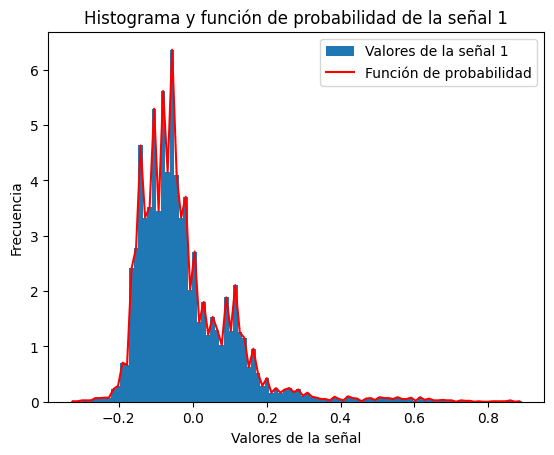

In [ ]:
#Formula de probabilidad
probabilidad, bin_edges = np.histogram(valoresgraf, bins=100, density=True)

#obtienes el punto medio de cada intervalo.
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Graficar el histograma
plt.hist(valoresgraf, bins=100, label='Valores de la señal 1', density=True)

# Graficar la función de probabilidad encima del histograma
plt.plot(bin_centers, probabilidad, 'r-', label='Función de probabilidad')

# Añadir leyenda y título
plt.legend()
plt.title('Histograma y función de probabilidad de la señal 1')
plt.xlabel('Valores de la señal')
plt.ylabel('Frecuencia')
plt.show()



**¨Gráfico #04. " Histrograma de la Señal Fisiológica por Funciones Predefinidas de Pyton". Elaboración Propia.**

**3.4  Relación señal ruido (SNR):** En este apartado, se evaluará la calidad de la señal fisiológica extraída al contaminarla con diferentes tipos de ruido. El objetivo es medir la relación señal-ruido (SNR) para cada tipo de ruido aplicado, permitiendo así cuantificar el impacto del ruido en la señal. Se utilizarán ruidos como el gaussiano, de impulso y tipo artefacto, y se registrarán los valores obtenidos mediante la tecnica de SNR.


**3.4.1 ¿Qué es la relación señal ruido (SNR)?**
Según Proakis,J.G (2007) en su libro "Digital Signal Processing: Principles, Algorithms, and Applications (4th ed.). Prentice Hall." describe la relacción señal-ruido (SNR) como una medida que compara  el nivel de la señal deseada con el nivel de ruido presente en la señal. Este parametro tiene en cuenta que los niveles altos de un SNR significa que la señal sobresale claramente sobre el ruido y si es bajo  significa que el ruido es comparable o superior a la señal, lo que puede deteriorar significativamente la calidad de la señal.


La fórmula general para calcular el SNR en Decibelios (dB) es:

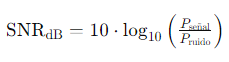

Donde:

* Pseñal es la potencia de la señal.
* Pruido es la potencia del ruido.


**3.4.2 Ejercicio de Contaminación de la Señal Fisiológica Extraída con Ruido Gaussiano y Medición el SNR:**

El **Ruido Gaussiano**, es un ruido aleatorio que sigue una distribucción normal, se caracteriza por que sus valores se agrupan entorno a una media que generalmente toma valores de cero (0), con una disminución en la probabilidad de ocurrencia a medida que se alejan de la media. Haykin, S. (2013).

A continuación, se muestra el ejercicio de contaminación y Medición:






POTENCIA DE LA SEÑAL SOLA: 0.017307815


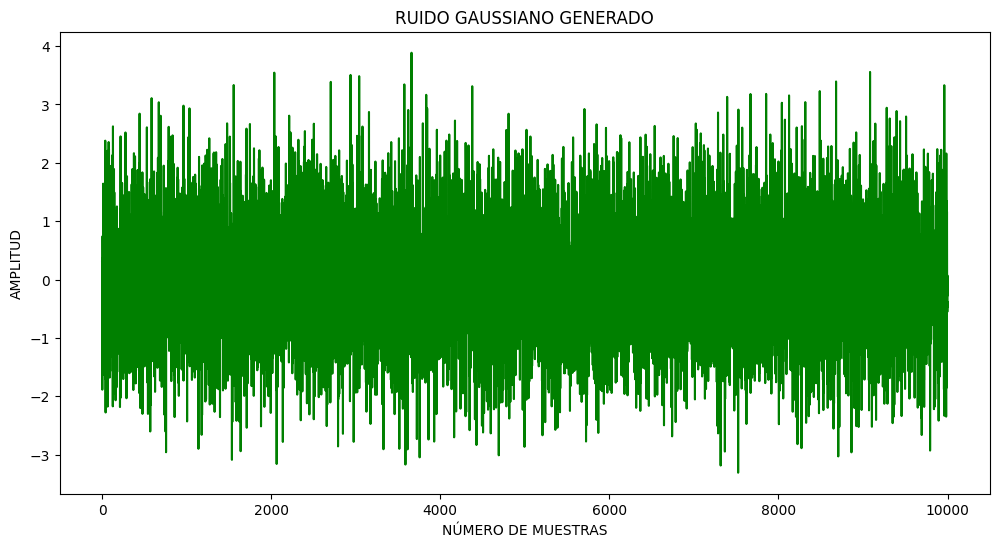

In [ ]:
Psignals=  np.sum(signal.p_signal[ :, 0]**2) / signal.sig_len
print(Fore.CYAN +"POTENCIA DE LA SEÑAL SOLA:",Psignals)

Mr = 0 # Media para el ruidoo
Der = 1 # Desviacion estandar ruido
Nmr = 10000 #Numero de Datos Contenidos en la Señal

# np.random.normal se utiliza para generar números aleatorios siguiendo una
# distribución normal (o gaussiana).
rgauss = np.random.normal (Mr , Der , Nmr)

plt.figure(figsize=(12, 6))
plt.title('RUIDO GAUSSIANO GENERADO')
plt.xlabel('NÚMERO DE MUESTRAS')
plt.ylabel('AMPLITUD')
plt.plot(rgauss, color = 'green')
plt.show ()

**¨Gráfico #05. " Ruido Gaussiano Generado ". Elaboración Propia.**

POTENCIA DEL RUIDO DE MENOR AMPLITUD 0.0006210043057881196


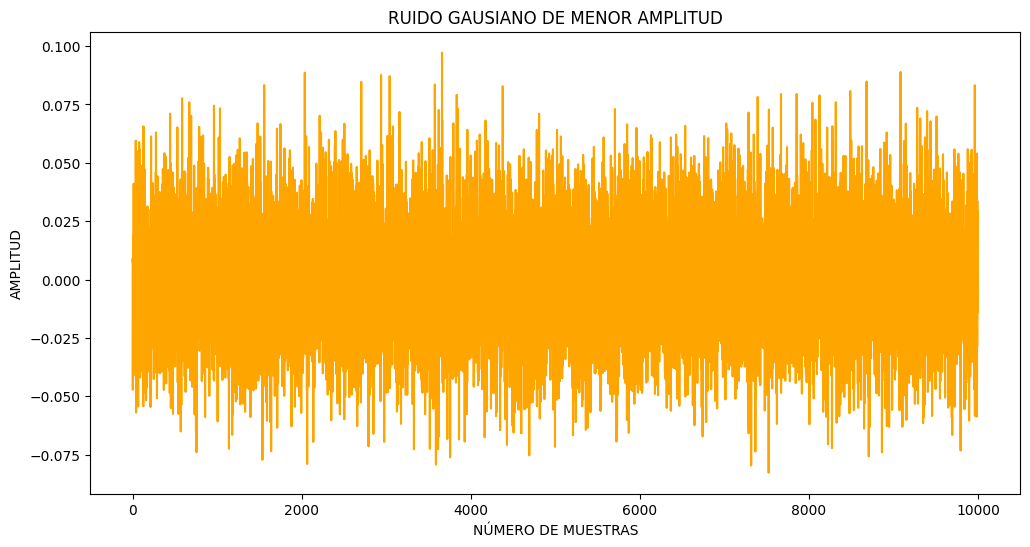

In [ ]:
ruidopositivo = rgauss /40
# FORMULA DE POTENCIA
Pruidoc = np.sum(ruidopositivo**2)/10000
print(Fore.CYAN + "POTENCIA DEL RUIDO DE MENOR AMPLITUD",Pruidoc)

plt.figure(figsize=(12, 6))
plt.title('RUIDO GAUSIANO DE MENOR AMPLITUD')
plt.xlabel('NÚMERO DE MUESTRAS')
plt.ylabel('AMPLITUD')
plt.plot (ruidopositivo , color ='orange')
plt.show()


**¨Gráfico #06. " Ruido Gaussiano Pequeño ". Elaboración Propia.**

SNR 14.385002647146665


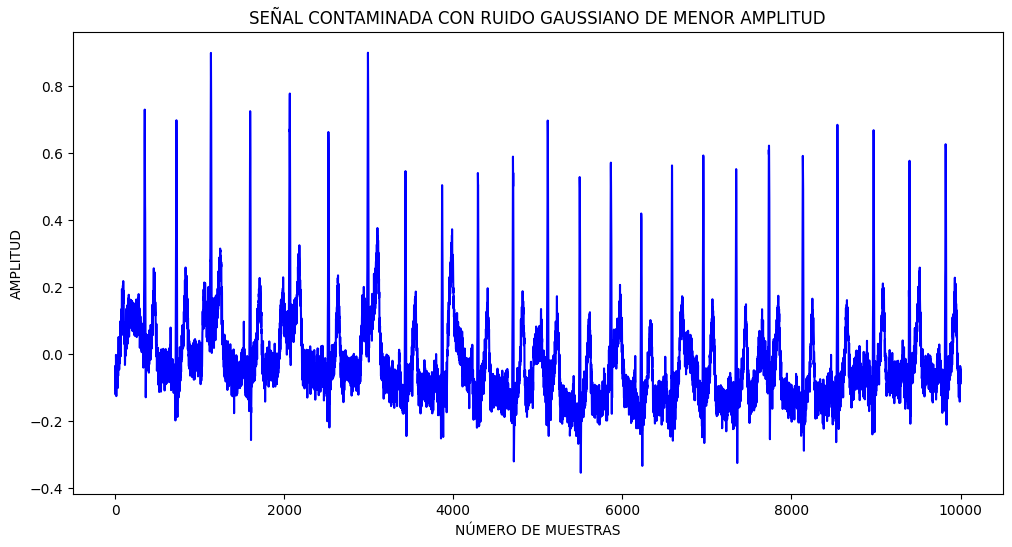

In [ ]:
señalconruidochiquito = ruidopositivo +valoresgraf
#FORMULA DEL SNR dB
snrc = 10 * np.log10(Psignals/ Pruidoc)
print (Fore.CYAN +"SNR", snrc )

plt.figure(figsize=(12, 6))
plt.title('SEÑAL CONTAMINADA CON RUIDO GAUSSIANO DE MENOR AMPLITUD')
plt.xlabel('NÚMERO DE MUESTRAS')
plt.ylabel('AMPLITUD')
plt.plot(señalconruidochiquito,color = 'blue')
plt.show()

**¨Gráfico #07. " Señal Contaminada con Ruido Gaussiano Menor Amplitud". Elaboración Propia.**

POTENCIA DEL RUIDO DE MAYOR AMPLITUD 0.9936068892609914
SNR GAUSSIANO MAYOR AMPLITUD -17.589723496030935


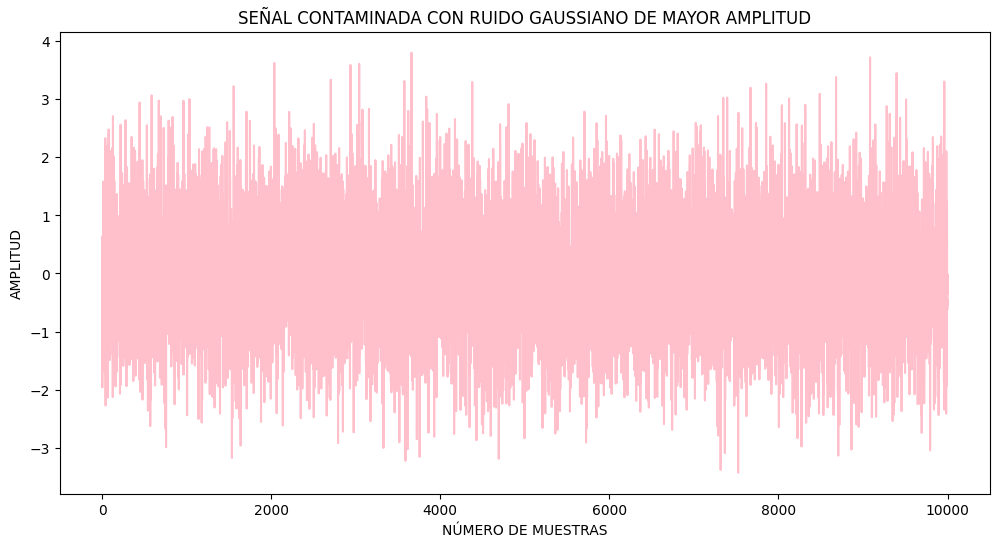

In [ ]:
#np.sum suma todos los datos
Pruido = np.sum(rgauss**2)/10000
print(Fore.CYAN +"POTENCIA DEL RUIDO DE MAYOR AMPLITUD",Pruido)

#Formula del SNR
snr = 10 * np.log10(Psignals / Pruido)
print (Fore.CYAN +"SNR GAUSSIANO MAYOR AMPLITUD", snr )

#señal Mayor Amplitud con ruido Gaussiano
senalconruidogrande = rgauss + valoresgraf

plt.figure(figsize=(12, 6))
plt.title('SEÑAL CONTAMINADA CON RUIDO GAUSSIANO DE MAYOR AMPLITUD')
plt.xlabel('NÚMERO DE MUESTRAS')
plt.ylabel('AMPLITUD')
plt.plot(senalconruidogrande, color = 'pink')
plt.show()

**¨Gráfico #08. " Señal Contaminada con Ruido Gaussiano De Mayor Amplitud ". Elaboración Propia.**

**3.4.3 Ejercicio de Contaminación de la Señal Fisiológica Extraída con Ruido Impulso y Medición el SNR:**

Como antecedente teorico González, R. C., & Woods, R. E. (2008), plantea que el **Ruido Impulso**, como un ruido que consiste en picos de alta amplitud que aparecen de forma esporádica en la señal. Estos impulsos son de corta duración y se manifiestan como puntos blancos y negros dispersos.ste tipo de ruido puede degradar significativamente la calidad de la imagen, y se deben aplicar técnicas específicas de filtrado para eliminar estos impulsos y recuperar la calidad de la imágen.

A continuación, se muestra el ejercicio de contaminación y Medición:

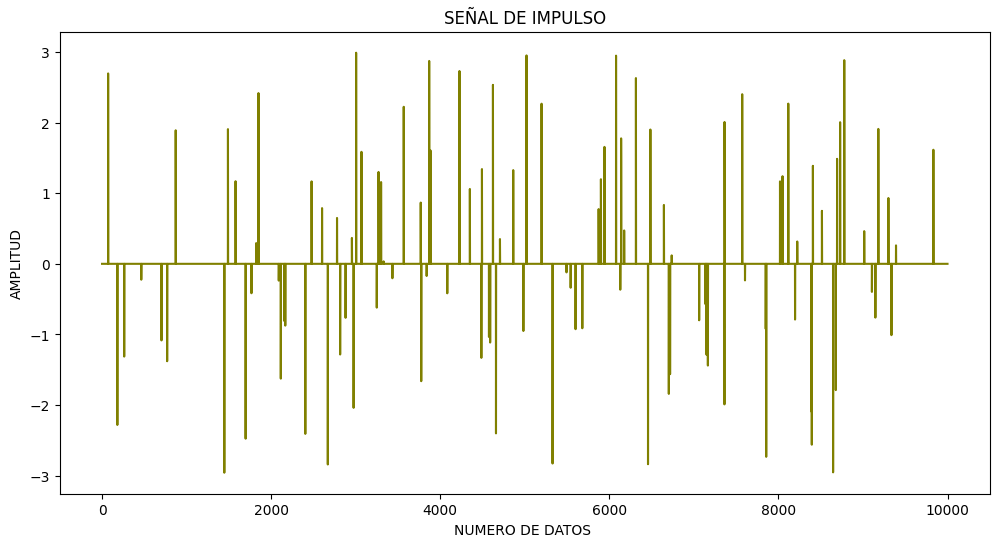

In [ ]:
#Numero de Datos Contenidos en la Señal
Nmr= 10000

#np.Zeros crea un array de ceros
# Establece que el impulso se dara en la posición 5000
senal_impulso = np.zeros(Nmr)
probabilideimpulso = 0.01 #probabilidad de que ocurra un impulso
amplitudelimpuso = 3 #amplitud del impulso

#Generar impulsos aleatorios
for i in range(Nmr):
    if np.random.rand() < probabilideimpulso:
      senal_impulso[i] = amplitudelimpuso * (2 * np.random.rand() - 1)

plt.figure(figsize=(12, 6))
plt.plot(senal_impulso, color = 'olive')
plt.title('SEÑAL DE IMPULSO')
plt.xlabel('NUMERO DE DATOS ')
plt.ylabel('AMPLITUD')
plt.show()




**¨Gráfico #09. " Ruido Impulso Generado". Elaboración Propia.**

POTENCIA IMPULSO DE MENOR AMPLITUD 1.8588070625627405e-05


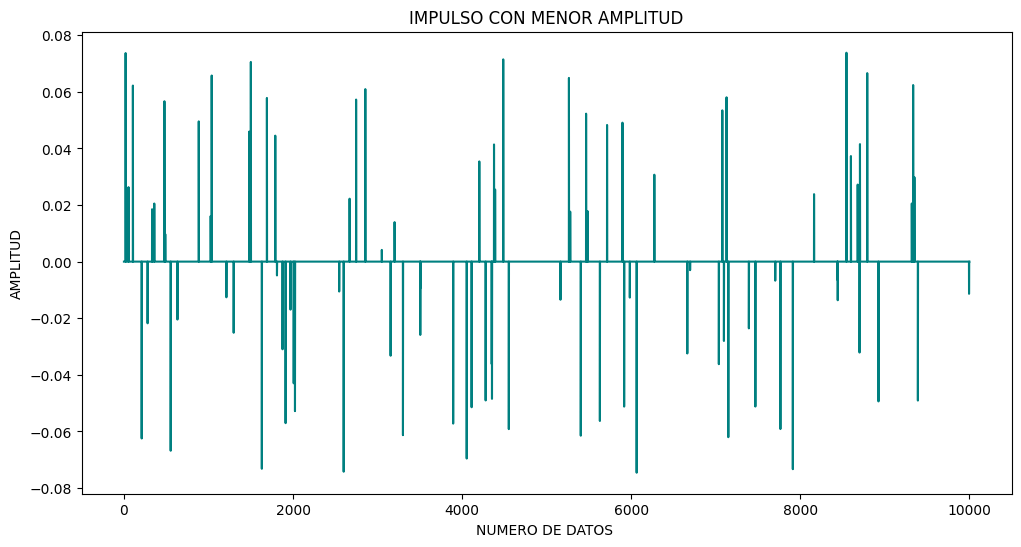

In [ ]:
impulsopequeno = senal_impulso /40

#FORMULA DE POTENCIA
Pimpulsop = np.sum(impulsopequeno**2)/10000
print(Fore.CYAN +"POTENCIA IMPULSO DE MENOR AMPLITUD",Pimpulsop)

plt.figure(figsize=(12, 6))
plt.title('IMPULSO CON MENOR AMPLITUD')
plt.xlabel('NUMERO DE DATOS ')
plt.ylabel('AMPLITUD')
plt.plot (impulsopequeno , color ='teal')
plt.show()

**¨Gráfico #09. " Impulso con Menor Amplitu". Elaboración Propia.**

SNR 29.690079305411786


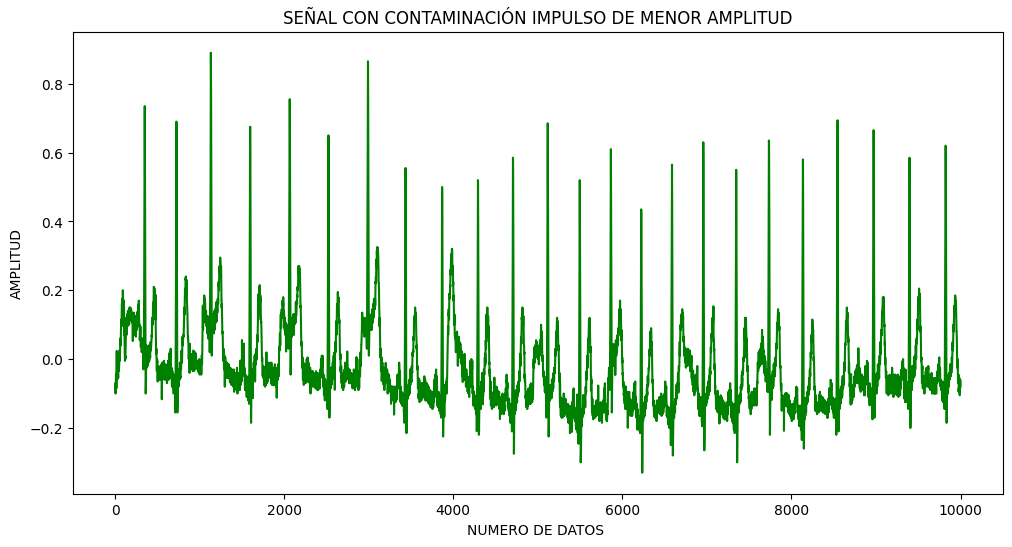

In [ ]:
senalimpulsopequeno = impulsopequeno + valoresgraf
#Formula Del SNR en dB
snrip = 10 * np.log10(Psignals / Pimpulsop)
print(Fore.CYAN +"SNR",snrip)

#Plotea la Figura
plt.figure(figsize=(12, 6))
plt.title('SEÑAL CON CONTAMINACIÓN IMPULSO DE MENOR AMPLITUD')
plt.xlabel('NUMERO DE DATOS ')
plt.ylabel('AMPLITUD')
plt.plot(senalimpulsopequeno,color = 'green')
plt.show()

**¨Gráfico #10. " Señal Contaminada con Ruido Impulso de Menor Amplitud ". Elaboración Propia.**

POTENCIA DEL RUIDO IMPULSO CON MAYOR AMPLITUD 1.8588070625627405e-05
SNR IMPULSO MAYOR AMPLITUD -2.2431196449264172


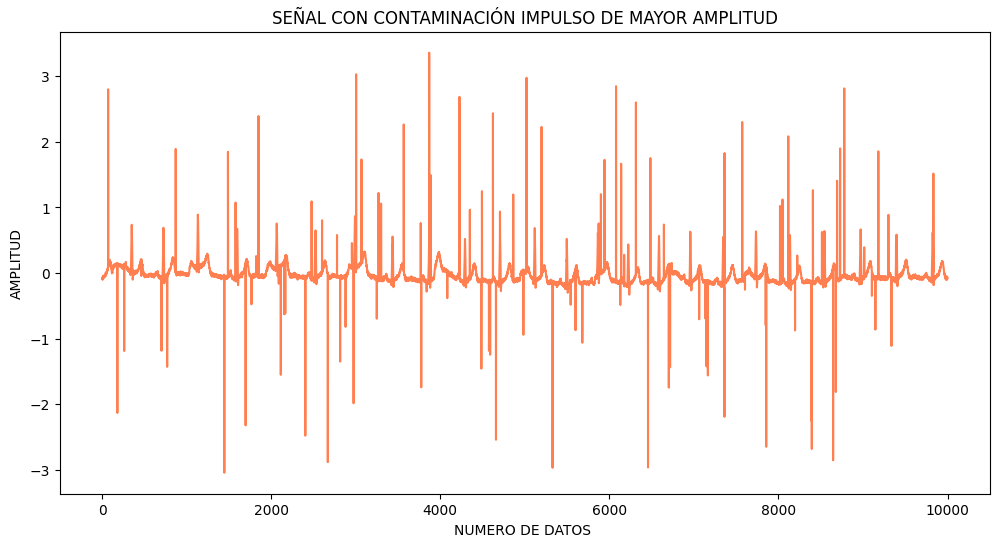

In [ ]:
#np.sum suma todos los datos
Pimpulsog = np.sum(senal_impulso**2)/10000
print(Fore.CYAN+ "POTENCIA DEL RUIDO IMPULSO CON MAYOR AMPLITUD",Pimpulsop)

#Formula  del SNR
snrig = 10 * np.log10(Psignals/ Pimpulsog)
print (Fore.CYAN+ "SNR IMPULSO MAYOR AMPLITUD", snrig )

#Señal Mayor Amplitud con ruido Impulso
senalimpulsogrande = senal_impulso + valoresgraf
plt.figure(figsize=(12, 6))
plt.title('SEÑAL CON CONTAMINACIÓN IMPULSO DE MAYOR AMPLITUD')
plt.xlabel('NUMERO DE DATOS ')
plt.ylabel('AMPLITUD')
plt.plot(senalimpulsogrande,color = 'coral')
plt.show()

**¨Gráfico #11. " Señal Contaminada con Ruido Impulso de Mayor Amplitud ". Elaboración Propia.**

**3.4.4 Ejercicio de Contaminación de la Señal Fisiológica Extraída con Ruido Artefacto y Medición el SNR:**
El **Ruido artefacto**, se refiere a las señales indeseadas que interfieren con la mediciones, distorsionando la información real que se pretende capturar. Chen,(2017).

A continuación, se muestra el ejercicio de contaminación y Medición:

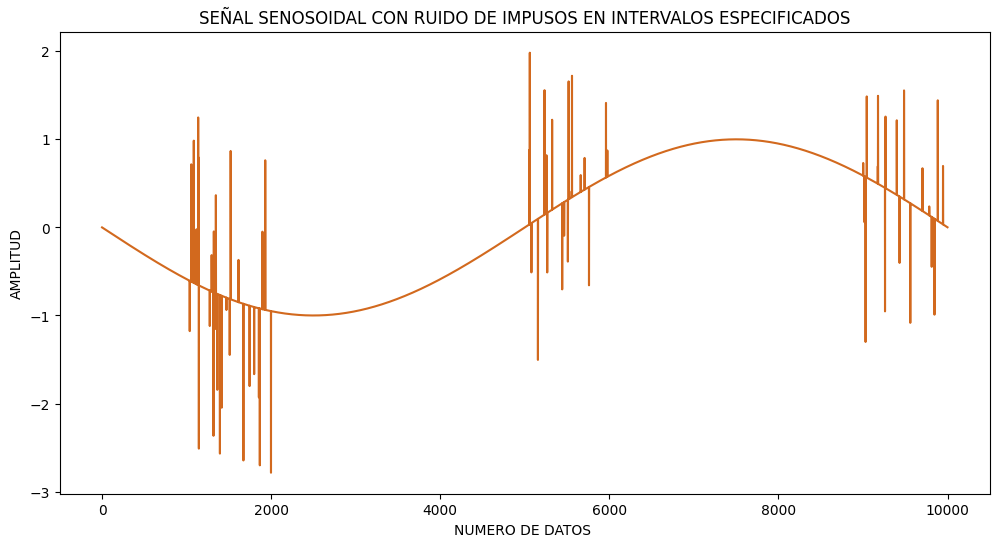

In [ ]:
# Parámetros
Nmr = 10000
frecuencia = 1.0001
amplitud_senoidal = 1
amplitud_impulso = 2.0

# Intervalos de ruido de impulsos (intervalos)
ruido_inicio = 1000
ruido_fin = 2000
ruido_inicio2 = 5000
ruido_fin2 = 6000
ruido_inicio3 = 9000
ruido_fin3 = 10000


# Generar señal senoidal
t = np.arange(Nmr) / frecuencia

#Función de la señal senoidal
senal = amplitud_senoidal * np.sin(2 * np.pi * t)

# IF que añaden el ruido de artefacto en los intervalos especificados
for i in range(ruido_inicio, ruido_fin):
    if np.random.rand() < 0.02:
        senal[i] += amplitud_impulso * (2 * np.random.rand() - 1)

for i in range(ruido_inicio2, ruido_fin2):
    if np.random.rand() < 0.02:
        senal[i] += amplitud_impulso * (2 * np.random.rand() - 1)

for i in range(ruido_inicio3, ruido_fin3):
    if np.random.rand() < 0.02:
        senal[i] += amplitud_impulso * (2 * np.random.rand() - 1)

# Plotear señal
plt.figure(figsize=(12, 6))
plt.plot(senal, color = 'Chocolate')
plt.title('SEÑAL SENOSOIDAL CON RUIDO DE IMPUSOS EN INTERVALOS ESPECIFICADOS')
plt.xlabel('NUMERO DE DATOS ')
plt.ylabel('AMPLITUD')
plt.show()

**¨Gráfico #12. " Señal Senosoidal con Ruido Artefacto por Intervalos ". Elaboración Propia.**

POTENCIA RUIDO ARTEFACTO MENOR AMPLITUD 0.0003181712651529699


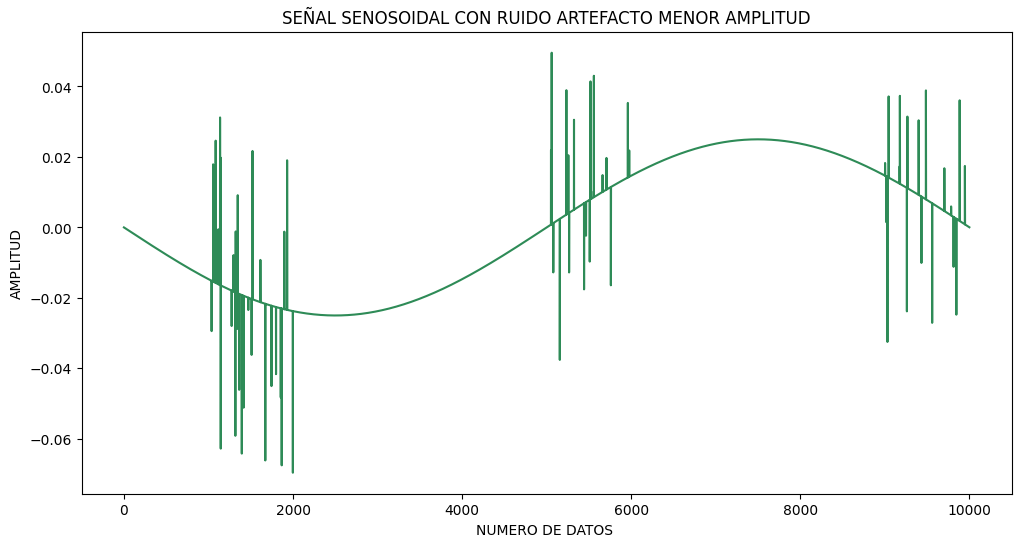

In [ ]:
# Se divide en 40 para que la amplitud quede mas reducida
senaldisminuida = senal /40

#Formula de Potencia
Partefactodis = np.sum(senaldisminuida**2)/10000
print(Fore. CYAN + "POTENCIA RUIDO ARTEFACTO MENOR AMPLITUD",Partefactodis)

# Plotear señal
plt.figure(figsize=(12, 6))
plt.plot(senaldisminuida, color = 'SeaGreen')
plt.title('SEÑAL SENOSOIDAL CON RUIDO ARTEFACTO MENOR AMPLITUD')
plt.xlabel('NUMERO DE DATOS ')
plt.ylabel('AMPLITUD')
plt.show()


**¨Gráfico #13. " Señal Senosoidal con Ruido Artefacto Menor Amplitud ". Elaboración Propia.**

SNR ARTEFACTO MENOR AMPLITUD: 17.355812896040945


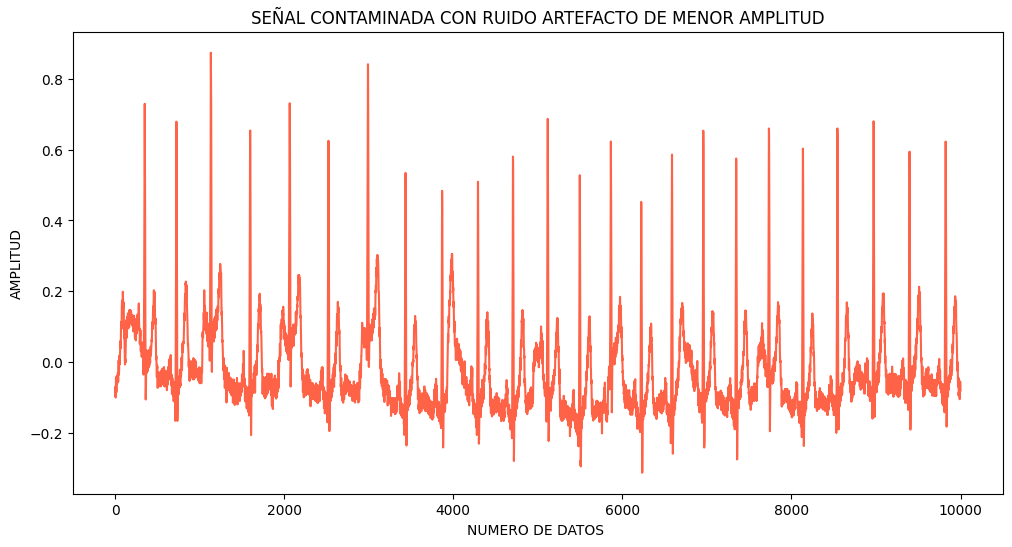

In [ ]:
senalartefactodis = senaldisminuida + valoresgraf
#Formula SNR dB
snrartefactodis = 10 * np.log10(Psignals / Partefactodis)
print (Fore.CYAN+ "SNR ARTEFACTO MENOR AMPLITUD:", snrartefactodis )

# Plotear señal
plt.figure(figsize=(12, 6))
plt.plot(senalartefactodis, color = 'Tomato')
plt.title('SEÑAL CONTAMINADA CON RUIDO ARTEFACTO DE MENOR AMPLITUD')
plt.xlabel('NUMERO DE DATOS ')
plt.ylabel('AMPLITUD')
plt.show()



**¨Gráfico #14. "Señal Contaminada con Ruido Artefacto de Menor Amplitud". Elaboración Propia.**

POTENCIA RUIDO ARTEFACTO MAYOR AMPLITUD 0.5090740242447519
SNR  -14.685386930518305


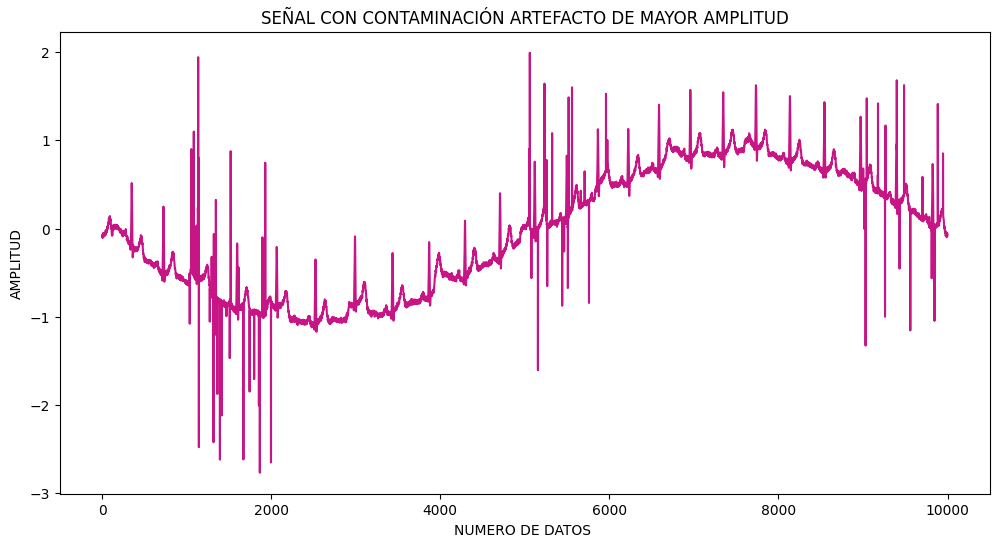

In [ ]:
#Np.sum suma todos los datos
Partefacto = np.sum(senal**2)/10000
print(Fore.CYAN+ "POTENCIA RUIDO ARTEFACTO MAYOR AMPLITUD",Partefacto)

#Formula del SNR
snrartefacto = 10 * np.log10(Psenalita / Partefacto)
print (Fore.CYAN+ "SNR ", snrartefacto )

#Señal Mayor Amplitud con ruido Artefacto
senalartefacto = senal + valoresgraf
plt.figure(figsize=(12, 6))
plt.title('SEÑAL CON CONTAMINACIÓN ARTEFACTO DE MAYOR AMPLITUD')
plt.xlabel('NUMERO DE DATOS ')
plt.ylabel('AMPLITUD')
plt.plot(senalartefacto,color = 'MediumVioletRed')
plt.show()

**¨Gráfico #15. "Señal Contaminada con Ruido Artefacto de Mayor Amplitud". Elaboración Propia.**

**4. Análisis de Datos**:
El análisis de la extracción de la señal Fisiológica , muestra que aunque el promedio es cercano a cero, la desviación estándar indica una variabilidad significativa alrededor de la media. La presencia de ruido o variación en los datos se refleja en el coeficiente de variación, que, al considerar su valor absoluto, sugiere una dispersión moderada. Estos resultados fueron fundamentales para ajustar y mejorar la calidad de la señal mediante técnicas de filtrado y procesamiento adicional, con el objetivo de obtener datos más precisos y fiables para su análisis en contextos clínicos. Otro aspecto  importante es la introducción de diferentes tipos de ruido que afectan la calidad de la señal, en primer lugar el ruido gaussiano aumenta la dispersión general, complicando la identificación de patrones reales y requiriendo técnicas de suavización para minimizar su impacto; el ruido de impulso introduce picos repentinos que distorsionan datos específicos, haciendo esencial la aplicación de métodos de detección y corrección de impulsos; y el ruido artefacto causa distorsiones complejas en la señal, afectando su forma y amplitud, lo que demanda la identificación precisa del origen y la aplicación de correcciones específicas.

**5.Conclusiones:**

* El desglose estadístico de la señal fisiológica  extraida de PhysioNet, permitio realizar cálculos mediante métricas como la media, la desviación estándar y el coeficiente de variación, complementado con la visualización de histogramas,desde perspectivas netamente matematicas como computacionales los cuales muestran su distribución y variabilidad de los patrones de comportamiento permitiendo asi una mayor interpretación.

* La incorporación de diversos tipos de ruido, como gaussiano, impulso y artefacto, ha demostrado cómo cada uno puede influir considerablemente en la calidad y en la interpretación de las señales biomédicas. Evaluar la relación señal-ruido (SNR) ha sido esencial para medir el efecto de estos ruidos y comprender de manera más precisa cómo cada tipo afecta la integridad de la señal.

* Mediante la práctica se lograr subrayar la importancia de habilidades de programación para el análisis de datos estadísticos que permitieron un manejo eficiente y preciso de grandes volúmenes de datos como lo fue la señal mendiante técnicas computacionales facilitando asi la obtención de señales por Data.


**6. Recomendaciones:**
1. Primero, para ser compilado asegúrese de que todos los paquetes necesarios estén instalados.Si no en la primera parte del codigo pueden encontrar las librerias necesarias a lo largo del codigo.

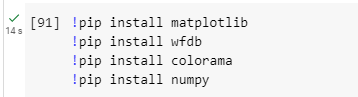

2. Verifique que los Archivos .hea y .dat estén en el directorio de trabajo actual o especifica de la ruta completa al archivo.

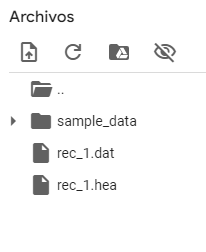

**si usted no cumple con estos  pasos es posible que el codigo no corra por las configuraciones del compilador collab**



**7.Bibliografía:**

[1]. PhysioNet databases. (s/f). Physionet.org. Recuperado el 1 de agosto de 2024, de https://physionet.org/about/database/.

[2]. Introducción a la probabilidad y estadística. (2022). Issuu. https://issuu.com/cengagelatam/docs/9786075701660_issuu.

[3].Witte, R. S., & Witte, J. S. (2017). Statistics: A guide to the use of statistical methods in the biomedical sciences (2nd ed.). Wiley.

[4].Johnson, R. A. (2019). Probability and statistics for engineers and scientists (9th ed., p. 158). Pearson.

[5].McCabe, G. P., & Craig, B. A. (2017). Introducción a la práctica de la estadística (9ª ed.). W.H. Freeman.

[6].- Proakis, J. G., & Manolakis, D. G. (2007). Digital Signal Processing: Principles, Algorithms, and Applications (4th ed.).

[7]. Prentice Hall.Haykin, S. (2013). Teoría de Filtros Adaptativos (5ª ed.). Prentice Hall.

[8].Haykin, S. (2013). Teoría de Filtros Adaptativos (5ª ed.). Prentice Hall.

[9].González, R. C., & Woods, R. E. (2008). Procesamiento Digital de Imágenes (3ª ed., p. 234). Pearson Educación.

[10].M. H. Chen, Y. C. Wang, y J. M. Lu, "Characterization and Reduction of Artifacts in Physiological Signal Measurement," IEEE Reviews in Biomedical Engineering, vol. 10, pp. 111-125, 2017.


